In [2]:
import pandas as pd 

data = pd.read_json('modcloth_final_data.json', lines=True)
data.head()


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [4]:
#menampilkan informasi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [5]:
#menampilkan column saja
data.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [6]:
data.columns = ['item_id','waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [9]:
#missing value percentage per column
missing_data = pd.DataFrame({'total_missing':data.isnull().sum(), 'perc_missing':(data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [10]:
#univariate 
data.describe()

,item_id,waist,size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


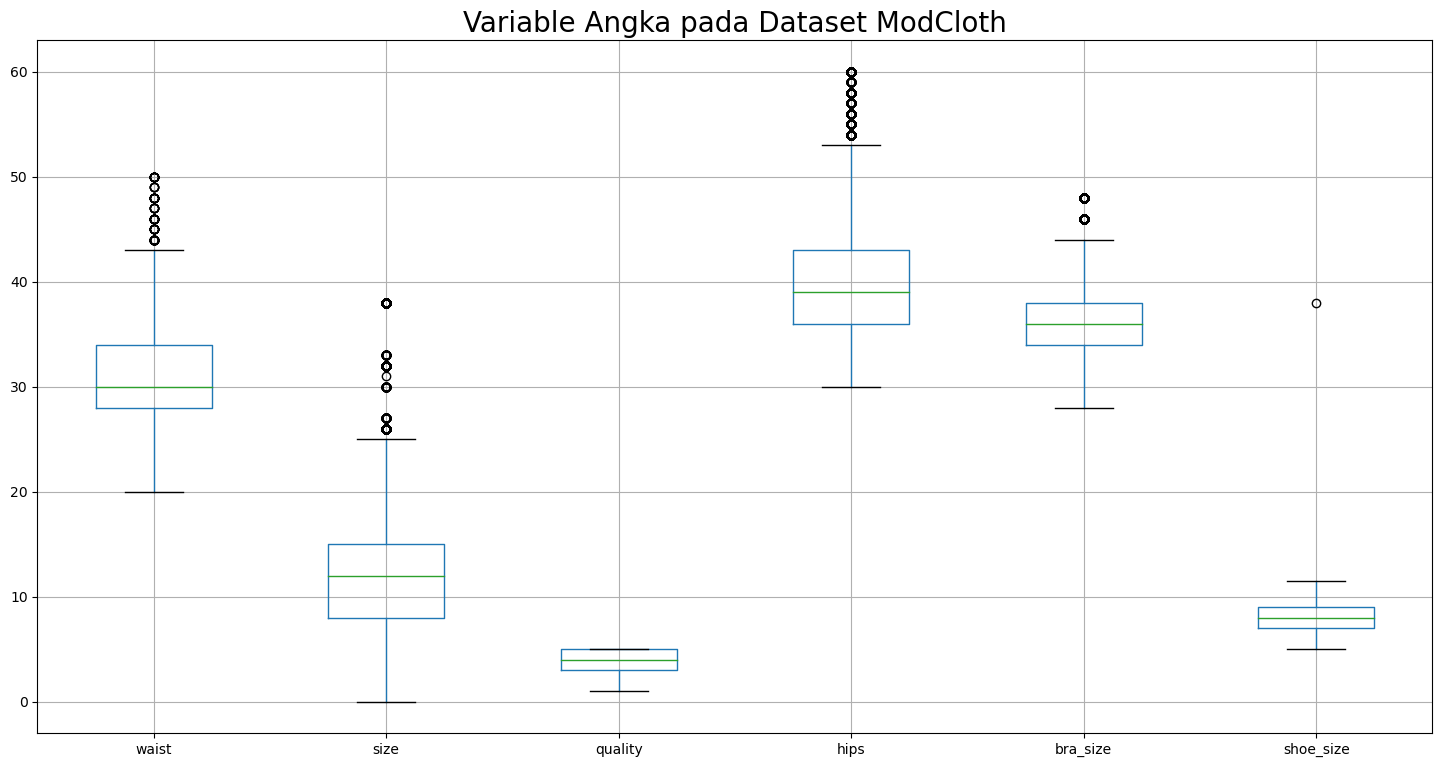

In [11]:
import matplotlib.pyplot as plt

num_cols = ['waist','size','quality','hips','bra_size','shoe_size'] #array data angka
plt.figure(figsize=(18,9)) #size dari gambar
data[num_cols].boxplot() #ploting boxplot
plt.title('Variable Angka pada Dataset ModCloth', fontsize=20)
plt.show()

In [12]:
data[data.shoe_size == 38]

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [13]:
data.at[37313,'shoe_size']=None  #untuk set nilai

In [14]:
data.iloc[37313,:]  #untuk search value

item_id                                                      416942
waist                                                          35.0
size                                                             12
quality                                                         5.0
cup_size                                                          d
hips                                                           46.0
bra_size                                                       36.0
category                                                        new
bust                                                          37-39
height                                                      5ft 5in
user_name                                                Catslittle
length                                                   just right
fit                                                             fit
user_id                                                      237498
shoe_size                                       

In [15]:
#cek jumlah value dari outlier per column
data.sort_values(by=['bra_size'],ascending=False).head(10)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


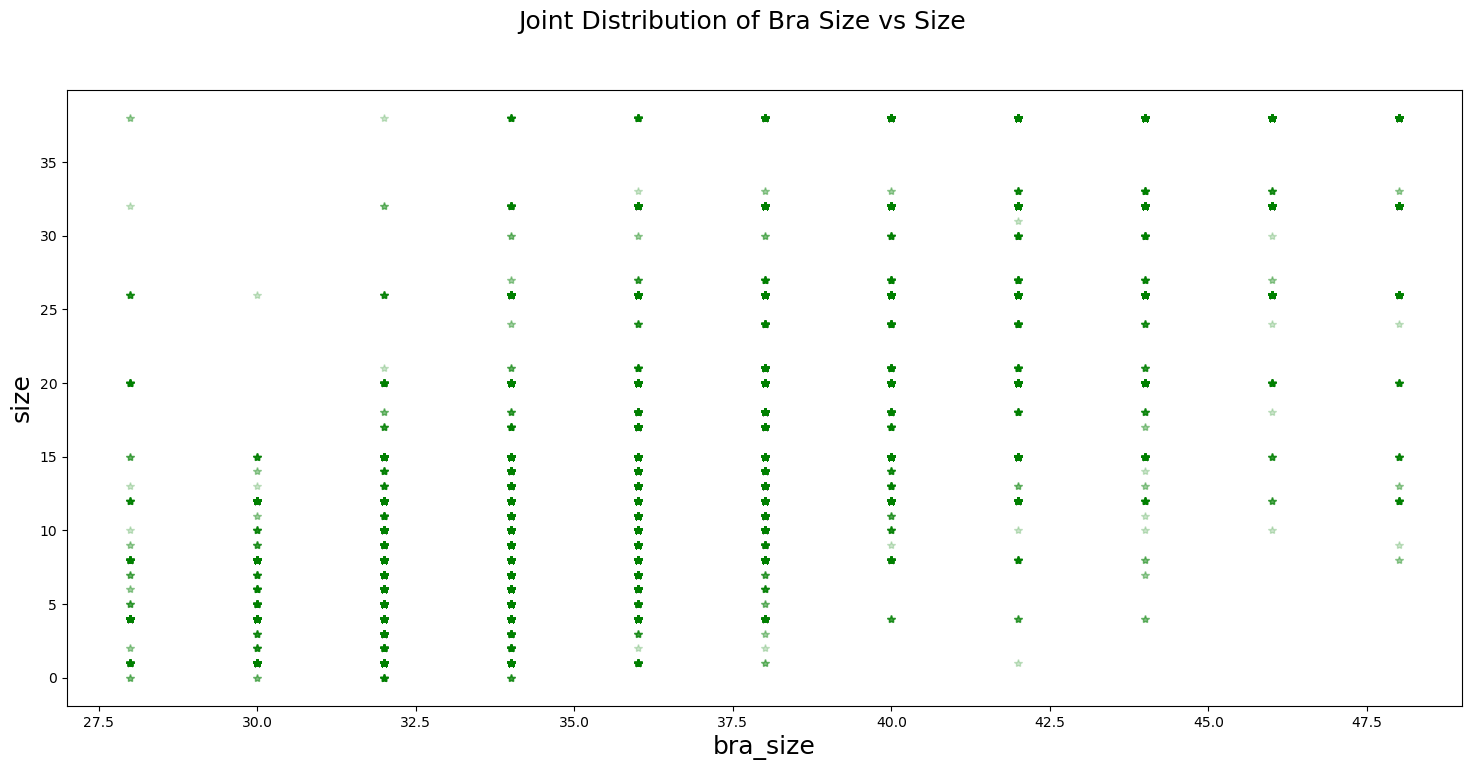

In [16]:
plt.figure(figsize=(18,8))
plt.xlabel('bra_size',fontsize=18)
plt.ylabel('size',fontsize=18)
plt.suptitle("Joint Distribution of Bra Size vs Size", fontsize=18)
plt.plot(data.bra_size,data['size'],'g*',alpha=0.2)
plt.show()

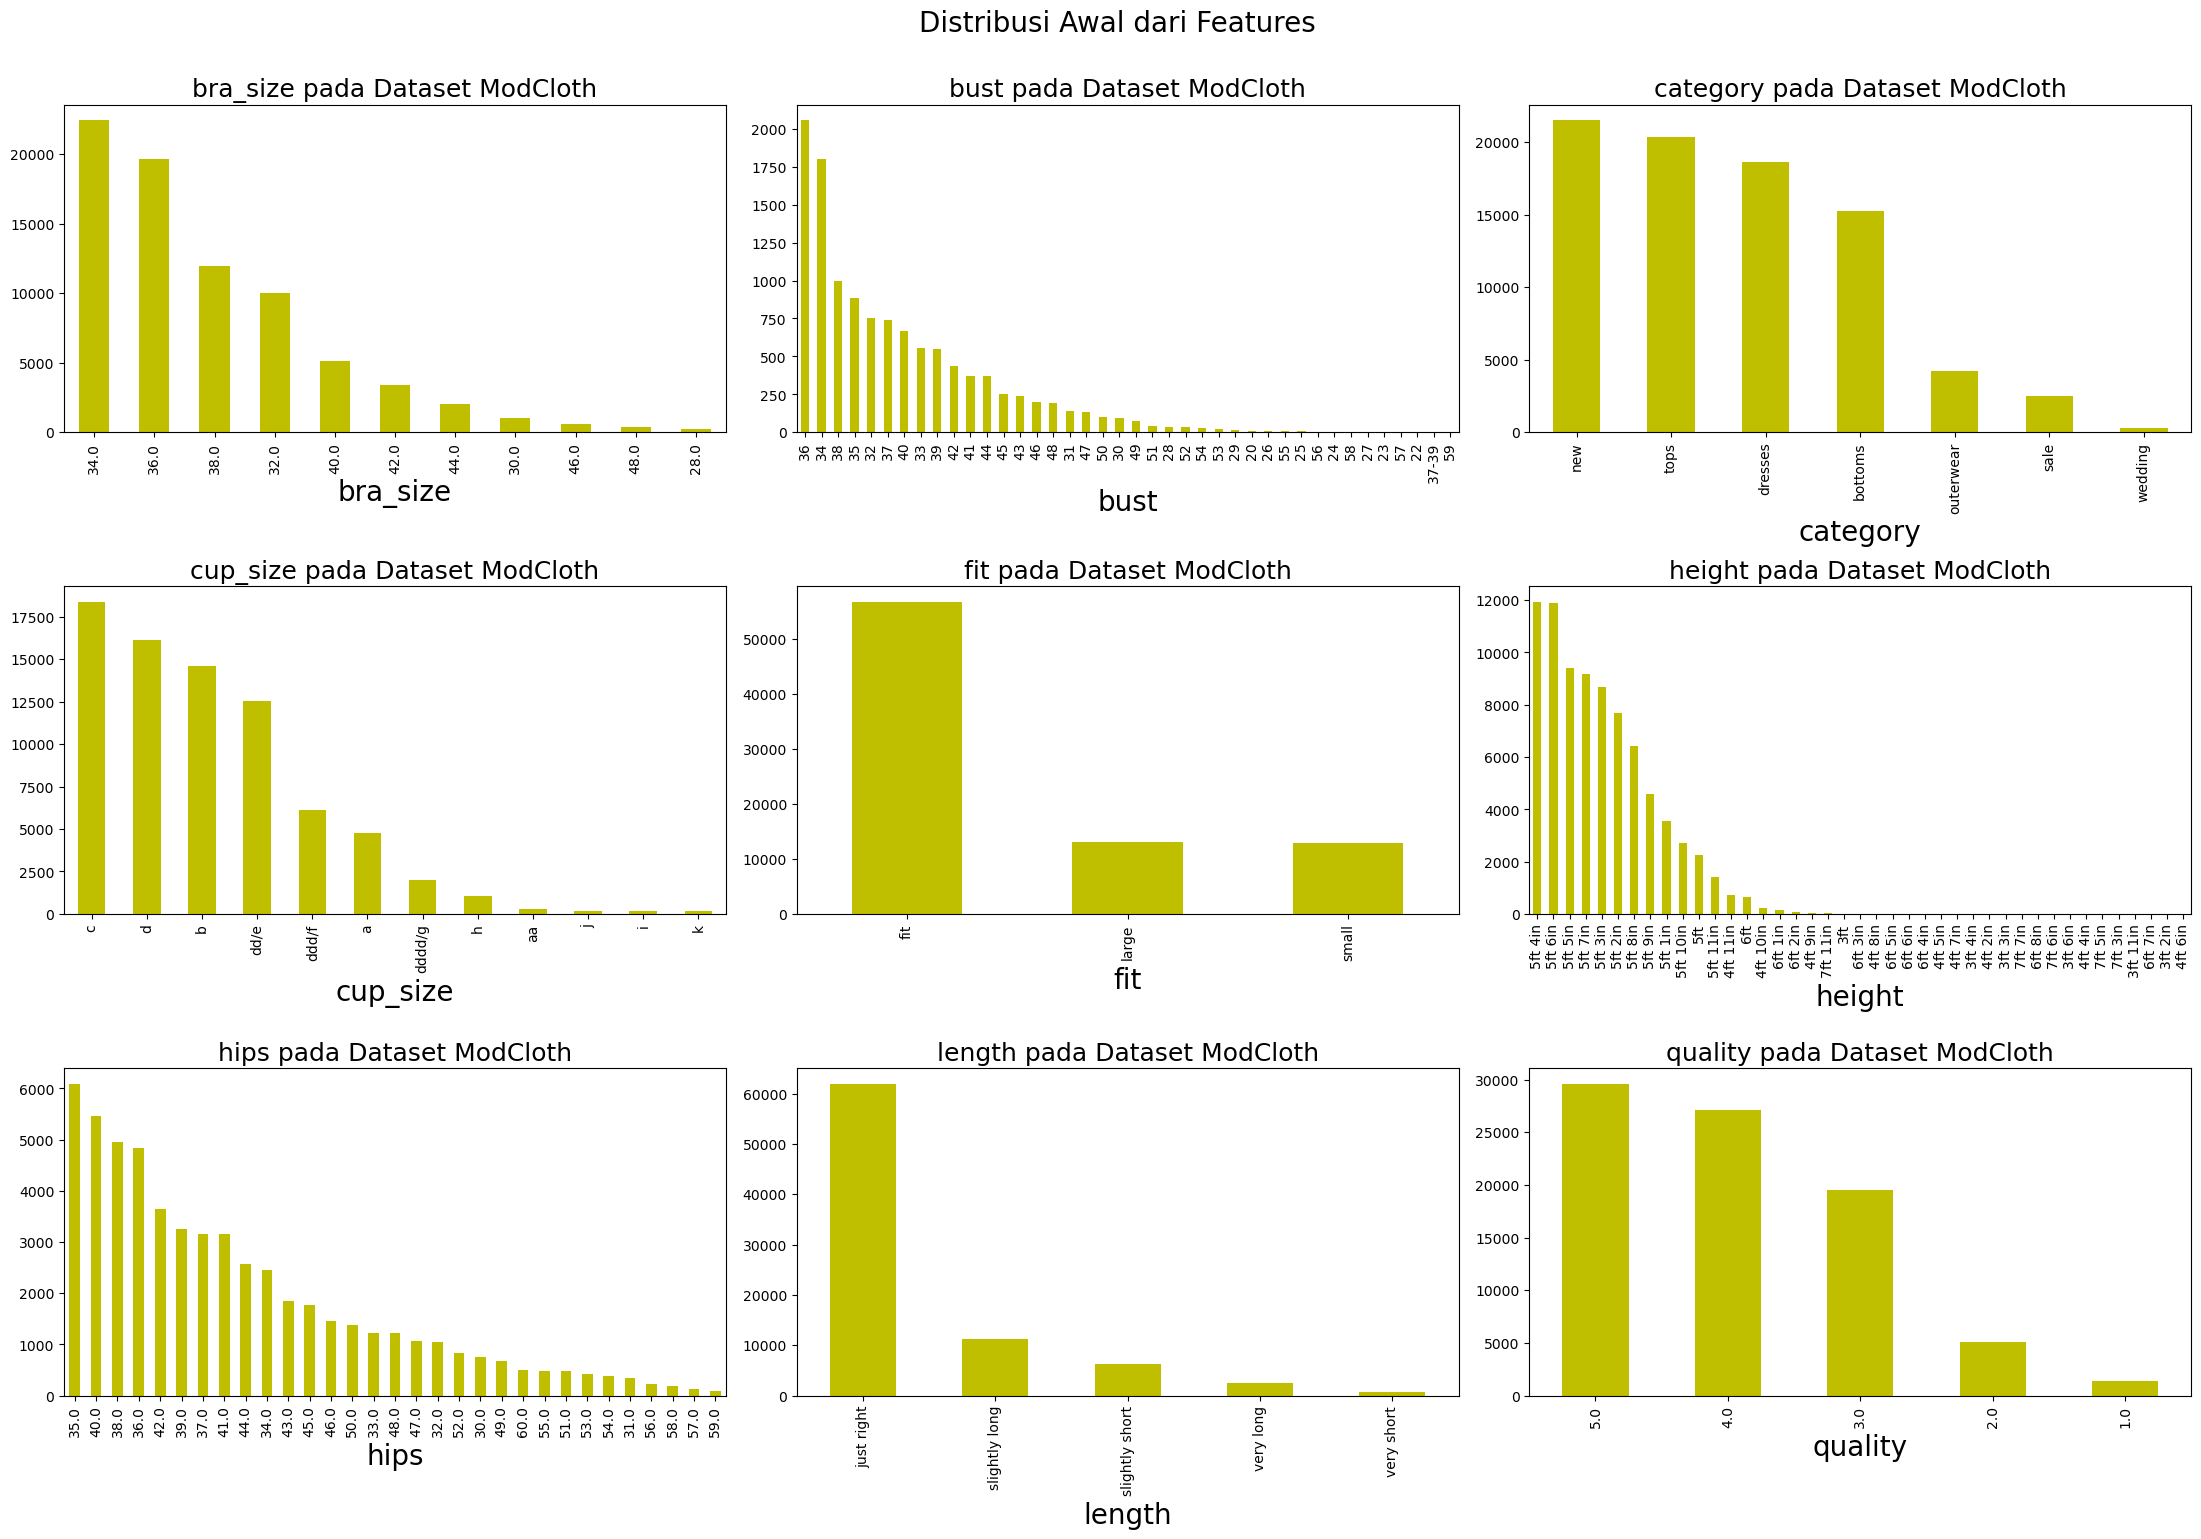

In [17]:
#Initial Plot

def plot_dist(col,ax):
    data[col][data[col].notnull()].value_counts().plot(kind='bar',facecolor='y',ax=ax)
    ax.set_xlabel('{}'.format(col),fontsize=20)
    ax.set_title('{} pada Dataset ModCloth'.format(col),fontsize=18)
    return ax

f,ax = plt.subplots(3,3, figsize=(22,15))
f.tight_layout(h_pad=9,w_pad=2, rect=[0,0.03,1,0.93])
cols=['bra_size','bust','category','cup_size','fit','height','hips','length','quality']
k=0

for i in range(3):
    for j in range(3):
        plot_dist(cols[k],ax[i][j])
        k +=1

__ = plt.suptitle("Distribusi Awal dari Features", fontsize=20)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27914 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [19]:
data.bra_size = data.bra_size.fillna('Unknown')
data.bra_size = data.bra_size.astype('category').cat.as_ordered()
data.at[37313,'bust']='38'
data.bust=data.bust.fillna(0).astype(int)
data.category = data.category.astype('category')

In [20]:
data[data.cup_size.isnull()].sample(20)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
61530,657081,NaN,15,5.0,NaN,35.0,38.0,new,0,5ft 1in,Angele,slightly long,fit,605568,NaN,NaN,I absolutley love this sk,"I absolutley love this skirt!Being short, and ..."
2750,136482,NaN,12,5.0,NaN,45.0,Unknown,new,0,5ft 6in,akshortie,just right,fit,886288,NaN,NaN,NaN,NaN
33844,412003,NaN,15,4.0,NaN,NaN,Unknown,new,0,5ft 7in,kmckeon1,just right,fit,144469,NaN,NaN,Great fit,Great fit
9406,161592,NaN,3,5.0,NaN,NaN,Unknown,dresses,0,5ft 4in,mesaelens,just right,fit,219747,NaN,NaN,Love this dress. I'm plan,Love this dress. I'm planning on getting marri...
49756,537285,NaN,26,5.0,NaN,NaN,Unknown,tops,0,5ft 9in,jrunty,just right,fit,770941,NaN,NaN,This is a great medium we,This is a great medium weight cardigan. I love...
37110,416738,NaN,12,5.0,NaN,NaN,Unknown,new,0,5ft 2in,claire.laprade,just right,fit,438882,NaN,NaN,perfect!,perfect!
43480,477210,NaN,12,1.0,NaN,35.0,Unknown,tops,0,5ft 3in,roni.leatherman,just right,large,24683,NaN,NaN,Not happy at all with thi,Not happy at all with this shirt. It feels ver...
71681,727560,NaN,15,3.0,NaN,NaN,Unknown,bottoms,0,5ft 6in,huttonln1,just right,fit,528745,NaN,NaN,Love this Bugle Joy skirt,Love this Bugle Joy skirt just like all the ot...
52427,546664,NaN,38,4.0,NaN,NaN,Unknown,tops,0,5ft 7in,tupelomana622,slightly long,large,156201,NaN,NaN,I just got this in the ma,I just got this in the mail today and I'm in L...
17370,210299,NaN,38,3.0,NaN,NaN,Unknown,dresses,0,5ft 8in,rachael.journey,just right,large,723846,NaN,NaN,"It's great quality, thick","It's great quality, thicker fabric than I thou..."


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   item_id         82790 non-null  int64   
 1   waist           2882 non-null   float64 
 2   size            82790 non-null  int64   
 3   quality         82722 non-null  float64 
 4   cup_size        76535 non-null  object  
 5   hips            56064 non-null  float64 
 6   bra_size        82790 non-null  category
 7   category        82790 non-null  category
 8   bust            82790 non-null  int32   
 9   height          81683 non-null  object  
 10  user_name       82790 non-null  object  
 11  length          82755 non-null  object  
 12  fit             82790 non-null  object  
 13  user_id         82790 non-null  int64   
 14  shoe_size       27914 non-null  float64 
 15  shoe_width      18607 non-null  object  
 16  review_summary  76065 non-null  object  
 17  review_text 

In [22]:
data.cup_size.fillna('Unknown', inplace=True)
data.cup_size = data.cup_size.astype('category').cat.as_ordered()

data.fit=data.fit.astype('category')

In [26]:
#conversi height satuannya ft ke cm
def get_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[0])*30.48)+ (int(x[4:-2])*2.54)
    except:
        return (int(x[0]))*30.48

data.height = data.height.apply(get_cms)

In [28]:
#cek konversi 
data['height'].head(20)

0     167.64
1     157.48
2     170.18
3        NaN
4     157.48
5     162.56
6     160.02
7     165.10
8     177.80
9     167.64
10    167.64
11    162.56
12    165.10
13    165.10
14    160.02
15    162.56
16    157.48
17       NaN
18    172.72
19    165.10
Name: height, dtype: float64

In [29]:
data[data.height.isnull()].head(20)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40.0,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34.0,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34.0,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38.0,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30.0,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


In [34]:
#first time buyer underwear
print(data[((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) & (data.hips.isnull()) & (data.shoe_size.isnull()) & (data.shoe_width.isnull()) & (data.waist.isnull())].head(3))

    item_id  waist  size  quality cup_size  hips bra_size category  bust  \
3    123373    NaN    21      5.0     dd/e   NaN  Unknown      new     0   
17   123373    NaN    15      4.0   dddd/g   NaN     36.0      new     0   
43   123373    NaN    15      5.0     dd/e   NaN     36.0      new     0   

    height     user_name      length    fit  user_id  shoe_size shoe_width  \
3      NaN  alexmeyer626  just right    fit   875643        NaN        NaN   
17     NaN         Megan  just right  large   128353        NaN        NaN   
43     NaN       sdhewey  just right    fit   670919        NaN        NaN   

   review_summary review_text  
3             NaN         NaN  
17            NaN         NaN  
43            NaN         NaN  


In [41]:
#first time buyer shoes
print(data[(data.bra_size == 'Unknown') & (data.cup_size == 'Unknown') & (data.height.isnull()) & (data.hips.isnull()) & ((data.shoe_size.notnull()) | (data.shoe_width.notnull())) & (data.waist.isnull())].head(3))

     item_id  waist  size  quality cup_size  hips bra_size category  bust  \
553   125442    NaN     7      5.0  Unknown   NaN  Unknown      new     0   
591   125442    NaN     7      3.0  Unknown   NaN  Unknown      new     0   
665   125442    NaN     7      5.0  Unknown   NaN  Unknown      new     0   

     height       user_name          length    fit  user_id  shoe_size  \
553     NaN  sharonpeporter   slightly long    fit   461540        7.0   
591     NaN     julia.burch  slightly short  small   675878        8.5   
665     NaN            Kate  slightly short    fit   131784        9.5   

    shoe_width review_summary review_text  
553    average            NaN         NaN  
591     narrow            NaN         NaN  
665       wide            NaN         NaN  


In [42]:
#first time buyer clothes
print(data[(data.bra_size == 'Unknown') & (data.cup_size == 'Unknown') & (data.height.notnull()) & ((data.hips.isnull()) | (data.waist.notnull())) & (data.shoe_size.isnull()) & (data.shoe_width.isnull())].head(3))

    item_id  waist  size  quality cup_size  hips bra_size category  bust  \
61   124024    NaN     9      5.0  Unknown   NaN  Unknown      new     0   
70   124124    NaN    26      5.0  Unknown   NaN  Unknown      new     0   
72   124124    NaN    26      3.0  Unknown   NaN  Unknown      new     0   

    height          user_name          length  fit  user_id  shoe_size  \
61  160.02             cdpase      just right  fit   277450        NaN   
70  175.26  inevitable.cities   slightly long  fit    29730        NaN   
72  175.26          Josephine  slightly short  fit   497767        NaN   

   shoe_width review_summary review_text  
61        NaN            NaN         NaN  
70        NaN            NaN         NaN  
72        NaN            NaN         NaN  


In [44]:
#make variable pakaian_dalam
pakaian_dalam = (((data.bra_size != 'Unknown') | (data.cup_size != 'Unknown')) & (data.height.isnull()) & (data.hips.isnull()) & (data.shoe_size.isnull()) & (data.shoe_width.isnull()) & (data.waist.isnull()))

In [45]:
#make variable shoes
sepatu = ((data.bra_size == 'Unknown') & (data.cup_size == 'Unknown') & (data.height.isnull()) & (data.hips.isnull()) & ((data.shoe_size.notnull()) | (data.shoe_width.notnull())) & (data.waist.isnull()))

In [46]:
#make variable clothes
pakaian = ((data.bra_size == 'Unknown') & (data.cup_size == 'Unknown') & (data.height.notnull()) & ((data.hips.isnull()) | (data.waist.notnull())) & (data.shoe_size.isnull()) & (data.shoe_width.isnull()))

In [49]:
data['first_time_user'] = (pakaian_dalam | sepatu | pakaian)
print('Kolom baru berhasil ditambah')
print('Total transaksi oleh pembeli pertama yang membeli 3 item itu ' + str(sum(data.first_time_user)))
print('Total pengguna pembeli pertama ' + str(len(data[(pakaian_dalam | sepatu | pakaian)].user_id.unique())))

Kolom baru berhasil ditambah
Total transaksi oleh pembeli pertama yang membeli 3 item itu 4801
Total pengguna pembeli pertama 3289


In [50]:
data

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,first_time_user
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.64,Emily,just right,small,991571,NaN,NaN,NaN,NaN,False
1,123373,31.0,13,3.0,b,30.0,36.0,new,0,157.48,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN,False
2,123373,30.0,7,2.0,b,NaN,32.0,new,0,170.18,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN,False
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN,True
4,123373,NaN,18,5.0,b,NaN,36.0,new,0,157.48,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,0,172.72,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!,False
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,0,165.10,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,False
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,0,162.56,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...,False
82788,807722,NaN,12,4.0,Unknown,NaN,Unknown,outerwear,0,160.02,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,True
